In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import numpy as np
from math import log
from CIoTS import *

In [ ]:
dimensions = 4
max_p = 20
incoming_edges = 5

In [3]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

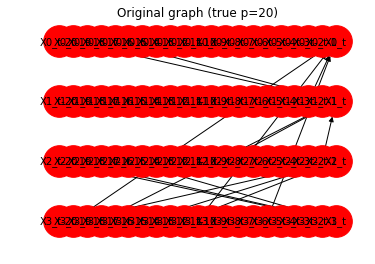

In [90]:
plt.title('Original graph (true p={})'.format(max_p))
generator.draw_graph()

In [99]:
def test_incremental_steps(ts, start, steps, patiency=2):
    _, graphs, times, bics = pc_incremental_extensive(partial_corr_test, ts, alpha=0.1, 
                                                      max_p=30, patiency=2, verbose=True, 
                                                      start=start, steps=steps)

#     for p, g in graphs.items():   
#         plt.title("Incrementally estimated graph for p="+str(p))
#         draw_graph(g, dimensions, p)
    t_nodes = ['X{}_t'.format(i) for i in range(dimensions)]

    ps = []
    f1 = []
    fpr = []
    tpr = []
    degs = []
    for p, g in graphs.items():
        ps.append(p)
        fpr.append(evaluate_edges(generator.graph, g)['FPR'])
        tpr.append(evaluate_edges(generator.graph, g)['TPR'])
        f1.append(evaluate_edges(generator.graph, g)['f1-score'])
        degs.append(np.mean([d for n,d in g.degree(t_nodes)]))
        
    plt.figure(figsize=(8,6))
    plt.title('f1 for different p-iterations')
    plt.xlabel('p')
    plt.ylabel('f1')
    plt.plot(ps, f1)
    plt.show()

    plt.figure(figsize=(8,6))
    plt.title('fpr and tpr for different p-iterations')
    plt.xlabel('p')
    plt.ylabel('fpr/tpr')
    plt.plot(ps, fpr, label='fpr')
    plt.plot(ps, tpr, label='tpr')
    plt.legend()
    plt.show()
    
    return ps, f1, fpr, tpr, degs

In [51]:
generator = CausalTSGenerator(dimensions=dimensions, max_p=max_p, data_length=10000, incoming_edges=incoming_edges)
ts = generator.generate()

In [54]:
from tqdm import tqdm
from collections import defaultdict

f1_per_step = defaultdict(list)
for iteration in tqdm(range(5)):
    ts = generator.generate()
    for step_size in tqdm([1,2,3,5,10]):
        ps, f1, degs = test_incremental_steps(ts, start=0, steps=step_size)
        f1_per_step[step_size].append(f1[-1])
    f1_per_step



  0%|          | 0/5 [00:00<?, ?it/s]


  0%|          | 0/5 [00:00<?, ?it/s]


 20%|██        | 1/5 [00:34<02:18, 34.55s/it]


 40%|████      | 2/5 [01:11<01:46, 35.36s/it]


 60%|██████    | 3/5 [01:38<01:05, 32.88s/it]


 80%|████████  | 4/5 [02:06<00:31, 31.28s/it]


100%|██████████| 5/5 [02:24<00:00, 27.22s/it]




 20%|██        | 1/5 [02:24<09:39, 144.98s/it]


  0%|          | 0/5 [00:00<?, ?it/s]


 20%|██        | 1/5 [01:08<04:33, 68.33s/it]


 40%|████      | 2/5 [01:55<03:06, 62.02s/it]


 60%|██████    | 3/5 [02:34<01:50, 55.12s/it]


 80%|████████  | 4/5 [02:53<00:44, 44.20s/it]


100%|██████████| 5/5 [03:10<00:00, 36.22s/it]




 40%|████      | 2/5 [05:36<07:57, 159.01s/it]


  0%|          | 0/5 [00:00<?, ?it/s]


 20%|██        | 1/5 [00:45<03:02, 45.61s/it]


 40%|████      | 2/5 [01:17<02:04, 41.42s/it]


 60%|██████    | 3/5 [01:52<01:19, 39.60s/it]


 80%|████████  | 4/5 [02:17<00:35, 35.14s/it]


100%|██████████| 5/5 [02:34<00:00, 29.62s/it]




 60%|██████   

In [56]:
[(k, np.mean(v)) for k, v in f1_per_step.items()]

[(1, 0.3544906196640995),
 (2, 0.3783302972552852),
 (3, 0.39826427531985786),
 (5, 0.5453328311835044),
 (10, 0.10653266831547865)]

In [57]:
f1_per_step

defaultdict(list,
            {1: [0.45070422535211263,
              0.3047619047619048,
              0.3076923076923077,
              0.4390243902439024,
              0.2702702702702703],
             2: [0.39506172839506176,
              0.24528301886792453,
              0.31683168316831684,
              0.5294117647058825,
              0.40506329113924056],
             3: [0.5964912280701754,
              0.33663366336633666,
              0.3333333333333333,
              0.4102564102564103,
              0.3146067415730337],
             5: [0.26315789473684215,
              0.6538461538461537,
              0.372093023255814,
              0.5538461538461539,
              0.8837209302325583],
             10: [0.078125,
              0.14285714285714285,
              0.11475409836065575,
              0.07518796992481203,
              0.12173913043478259]})

In [96]:
def test_incremental_steps_pc1(ts, start, steps, patiency=5):
    _, graphs, times, bics = pc_incremental_pc1(partial_corr_test, ts, alpha=0.1, 
                                                      max_p=30, patiency=patiency, verbose=True, 
                                                      start=start, steps=steps)

#     for p, g in graphs.items():   
#         plt.title("Incrementally estimated graph for p="+str(p))
#         draw_graph(g, dimensions, p)
    t_nodes = ['X{}_t'.format(i) for i in range(dimensions)]

    ps = []
    f1 = []
    fpr = []
    tpr = []
    degs = []
    for p, g in graphs.items():
        ps.append(p)
        fpr.append(evaluate_edges(generator.graph, g)['FPR'])
        tpr.append(evaluate_edges(generator.graph, g)['TPR'])
        f1.append(evaluate_edges(generator.graph, g)['f1-score'])
        degs.append(np.mean([d for n,d in g.degree(t_nodes)]))
        
    plt.figure(figsize=(8,6))
    plt.title('f1 for different p-iterations')
    plt.xlabel('p')
    plt.ylabel('f1')
    plt.plot(ps, f1)
    plt.show()

    plt.figure(figsize=(8,6))
    plt.title('fpr and tpr for different p-iterations')
    plt.xlabel('p')
    plt.ylabel('fpr/tpr')
    plt.plot(ps, fpr, label='fpr')
    plt.plot(ps, tpr, label='tpr')
    plt.legend()
    plt.show()

    return ps, f1, fpr, tpr, degs

In [59]:
test_incremental_steps_pc1(ts, start=0, steps=1)

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [0.058823529411764705,
  0.0909090909090909,
  0.16,
  0.14545454545454545,
  0.16666666666666666,
  0.15625,
  0.15384615384615383,
  0.18461538461538463,
  0.18749999999999997,
  0.21212121212121213,
  0.23880597014925373,
  0.22535211267605632,
  0.17142857142857143,
  0.17910447761194026,
  0.18749999999999997,
  0.21212121212121213,
  0.25000000000000006,
  0.28571428571428575,
  0.43333333333333335,
  0.48275862068965514,
  0.4745762711864407,
  0.4666666666666667,
  0.4666666666666667,
  0.4590163934426229,
  0.4666666666666667,
  0.4666666666666667,
  0.4745762711864407,
  0.4590163934426229,
  0.4666666666666667,
  0.4590163934426229],
 [3.5,
  6.0,
  7.5,
  8.75,
  10.0,
  11.0,
  11.25,
  11.25,
  11.0,
  11.5,
  11.75,
  12.75,
  12.5,
  11.75,
  11.0,
  11.5,
  11.0,
  10.75,
  10.0,
  9.5,
  9.75,
  10

In [60]:
test_incremental_steps_pc1(ts, start=0, steps=3)

([3, 6, 9, 12, 15, 18, 21, 24, 27, 30],
 [0.15094339622641512,
  0.1492537313432836,
  0.17391304347826086,
  0.21333333333333335,
  0.20588235294117646,
  0.2985074626865672,
  0.5,
  0.48387096774193544,
  0.4918032786885247,
  0.48387096774193544],
 [8.25, 11.75, 12.25, 13.75, 12.0, 11.75, 10.0, 10.5, 10.25, 10.5])

In [61]:
test_incremental_steps_pc1(ts, start=0, steps=5)

([5, 10, 15, 20, 25, 30],
 [0.15151515151515152,
  0.1728395061728395,
  0.21052631578947364,
  0.5818181818181818,
  0.5084745762711865,
  0.46153846153846156],
 [11.5, 15.25, 14.0, 8.75, 9.75, 11.25])

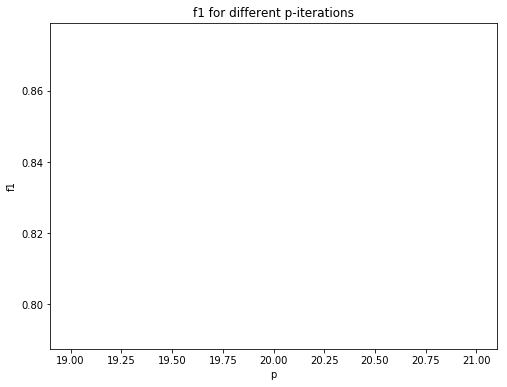

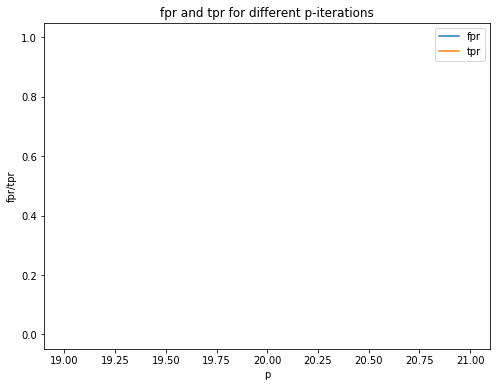

([20], [0.8333333333333333], [0.0011507479861910242], [1.0], [7.0])

In [97]:
test_incremental_steps_pc1(ts, start=0, steps=20, patiency=0)

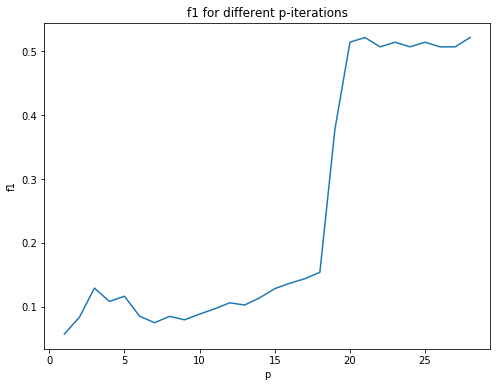

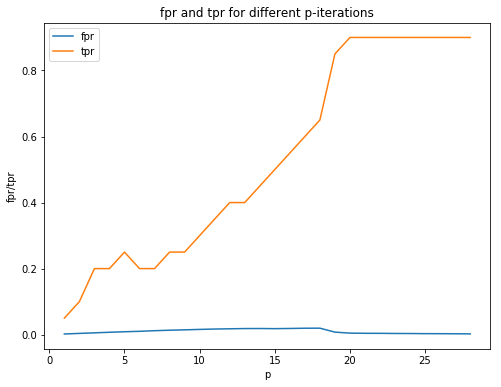

([1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [0.05714285714285715,
  0.08333333333333333,
  0.12903225806451613,
  0.10810810810810811,
  0.11627906976744187,
  0.0851063829787234,
  0.07476635514018691,
  0.0847457627118644,
  0.07936507936507937,
  0.08823529411764706,
  0.09655172413793103,
  0.10596026490066225,
  0.10256410256410256,
  0.11392405063291139,
  0.12820512820512822,
  0.13664596273291926,
  0.1437125748502994,
  0.15384615384615385,
  0.3777777777777778,
  0.5142857142857143,
  0.5217391304347826,
  0.5070422535211269,
  0.5142857142857143,
  0.5070422535211269,
  0.5142857142857143,
  0.5070422535211269,
  0.5070422535211269,
  0.5217391304347826],
 [0.0020138089758342925,
  0.0037399309551208286,
  0.005466052934407365,
  0.007192174913693901,
  0.008774453394706559,
  0.010069044879171462,
  0.011939010356731877,
  0.013377445339470656,
  0.0145281933

In [100]:
test_incremental_steps(ts, start=0, steps=1, patiency=2)